#Introducción a Data Science - Desafío 7

##24 de agosto de 2021
##Francisca Pinto

###Parte I

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (3,2)
plt.rcParams["figure.dpi"] = 100

In [3]:
df = pd.read_csv("/content/nations.csv", encoding = "iso-8859-1")
df.drop(columns = "Unnamed: 0", inplace = True)
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


###Parte II

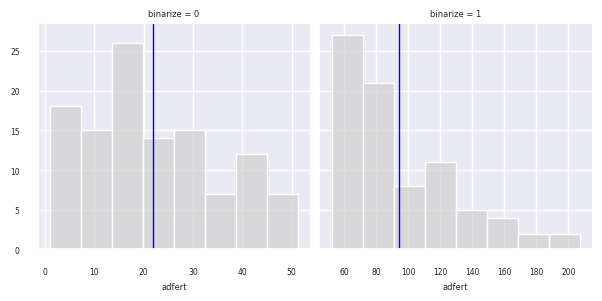

In [14]:
def sns_binarize_hist (dataframe, variable):
  
  if isinstance(dataframe[variable], pd.Series) is True:
    if dataframe[variable].dtype != "object":
  
      df["binarize"] = np.where(dataframe[variable] >= np.mean(dataframe[variable]), 1, 0)
 
      hist_1 = dataframe[dataframe["binarize"] == 1][variable].dropna()
      hist_0 = dataframe[dataframe["binarize"] == 0][variable].dropna()
 
      hist = [hist_0, hist_1]
 
      #utilizamos FacetGrid para separar los valores en función de binarize
 
      sns.set(font_scale = 0.5)
  
      grid = sns.FacetGrid(dataframe, col = "binarize", col_wrap = 2, sharex = False)
 
      axes = grid.axes.flatten()
 
      axes[0].set_title(f"{variable} < a {np.mean(dataframe[variable])}")
      axes[1].set_title(f"{variable} >= a {np.mean(dataframe[variable])}")
 
      grid = grid.map(sns.histplot, variable, color = "lightgrey")
 
      for i, j in zip(grid.axes.flatten(), hist):
        i.axvline(x = np.mean(j), color = "blue", lw = 1, linestyle = "-")
 
    else:
      raise ValueError("El objeto ingresado no tiene datos tipo integer o float, elige otra Serie.")
  else:
    raise ValueError("Los datos no son del tipo pd.Series, selecciona otros.")
 
sns_binarize_hist(df, "adfert")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/pytho

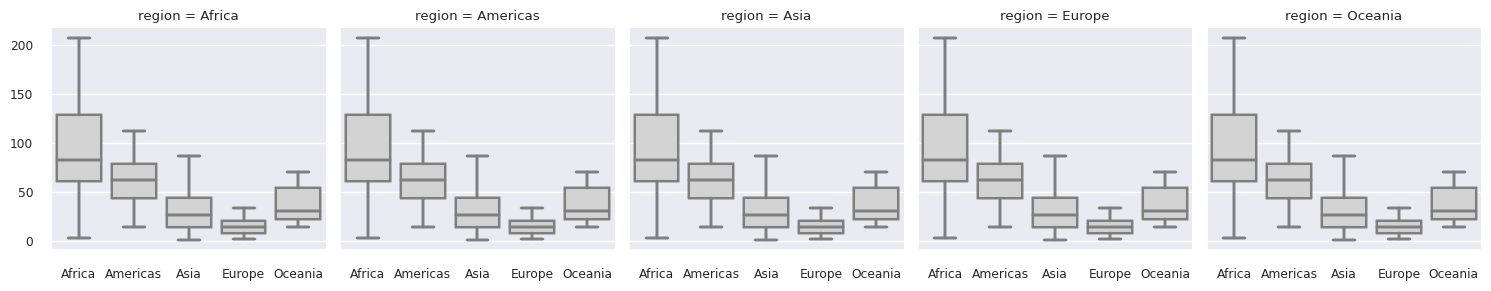

In [11]:
def sns_grouped_boxplot(dataframe, variable, group_by):
    
  if isinstance(dataframe[variable], pd.Series) is True:
    if dataframe[variable].dtype != "object":
      
      dataframe[variable] = dataframe[variable].dropna()
      sns.set(font_scale = 0.8)
      group = dataframe[group_by].unique()
      grid = sns.FacetGrid(dataframe, col = group_by, col_wrap = len(group), sharey = True)

      for i in dataframe.iteritems():
        
        grid.map(sns.boxplot, x = group_by, y = dataframe[variable], orient = "v", showfliers = False, color = "lightgrey", data = dataframe)

    else:
      raise ValueError("El objeto ingresado no tiene datos tipo integer o float, elige otra Serie.")
  else:
    raise ValueError("Los datos no son del tipo pd.Series, selecciona otros.")

sns_grouped_boxplot(df, "adfert", "region")

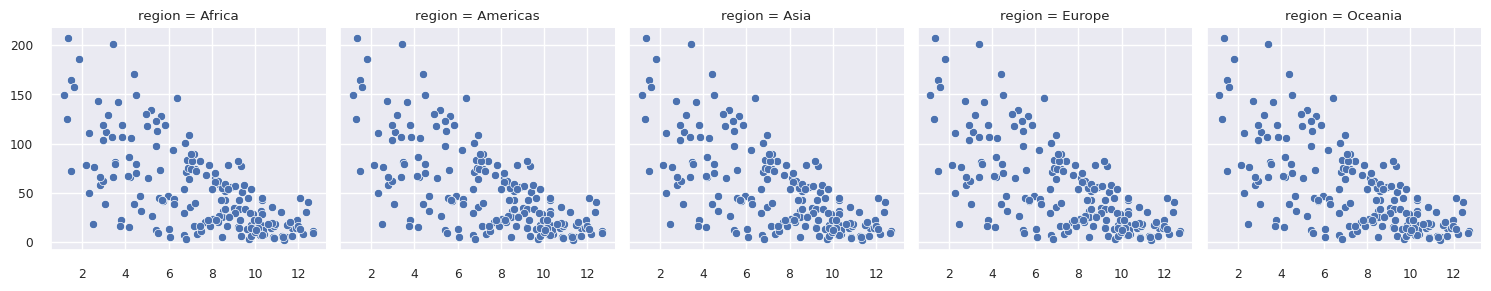

In [20]:
def sns_grouped_scatterplot(dataframe, x, y, group_by):

    sns.set(font_scale = 0.8)
    group = dataframe[group_by].unique()

    grid = sns.FacetGrid(dataframe, col = group_by, col_wrap = len(group), sharey = True)

    for i, j in enumerate(group):
        
      grid = grid.map(sns.scatterplot, x = dataframe[dataframe[group_by] == j][x], y = dataframe[dataframe[group_by] == j][y])

sns_grouped_scatterplot(df, "school", "adfert", "region")

###Parte III

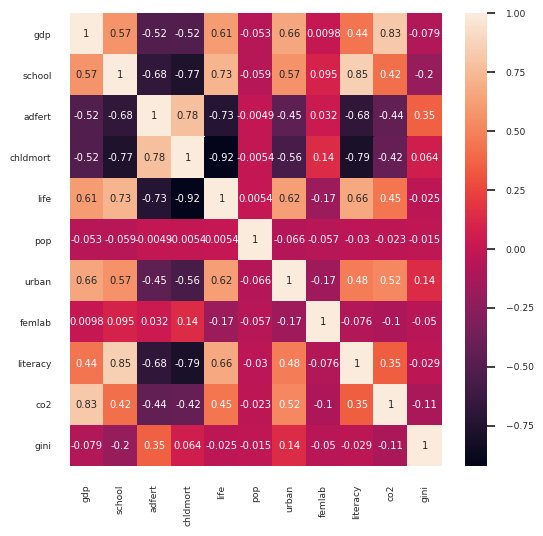

In [35]:
subset_corr = df.dropna()
subset_corr = df.loc[:, "gdp": "gini"]

mat_corr = subset_corr.corr()
plt.figure(figsize=(6, 6))

sns.set(font_scale = 0.6)
sns.heatmap(mat_corr, annot = True)

Las correlaciones detectadas son (correlación mayor o igual a 0.6):
1. "gdp" y "co2"
2. "school" y "iteracy"
3. "adfert" y "chldmort" 
4. "school" y "life"
5. "gdp" y "urban"
6. "gdp" y "life"